In [1]:
import pandas as pd
import numpy as np


# importing dataset
df = pd.read_csv("dataset.csv")

df.head()


,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,...,avg_latency_to_global_hubs_ms,number_of_fiber_connections,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,Unnamed: 19,Unnamed: 20
0,United States,5426,300+,"~2,000+","~3,552,000,000","~12,000+",~27%,"I:5%, II:15%, III:60%, IV:20%","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,40,60+,12%,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",NaN,NaN
1,Germany,529,50,~200,"~350,000,000","~2,000+",40%+,"II:10%, III:70%, IV:20%","Equinix, Digital Realty, e-shelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,30+,8%,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbon-neutral push","Statista, CBRE, IEA",NaN,NaN
2,United Kingdom,523,30,~150,"~200,000,000","~1,000+",0.45,"II:15%, III:70%, IV:15%","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,40,25+,7%,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbon-neutral targets","Statista, CBRE, IEA",NaN,NaN
3,China,449,100,"~1,000+","~500,000,000","~8,000+",0.25,"II:20%, III:60%, IV:20%","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",...,75,40+,15%,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",NaN,NaN
4,France,322,20,~110,"~120,000,000",~700,40%+,"II:20%, III:70%, IV:10%","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,20+,6%,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   country                                       191 non-null    object
 1   total_data_centers                            191 non-null    int64 
 2   hyperscale_data_centers                       191 non-null    object
 3   colocation_data_centers                       191 non-null    object
 4   floor_space_sqft_total                        191 non-null    object
 5   power_capacity_MW_total                       191 non-null    object
 6   average_renewable_energy_usage_percent        191 non-null    object
 7   tier_distribution                             179 non-null    object
 8   key_operators                                 170 non-null    object
 9   cloud_provider                                149 non-null    object
 10  in

In [3]:
# cleaning the numbers
import re

df = df.replace("[~+%-]", "", regex=True)# removed extra characters

df.head(50)



,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,...,avg_latency_to_global_hubs_ms,number_of_fiber_connections,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,Unnamed: 19,Unnamed: 20
0,United States,5426,300,"2,000","3,552,000,000","12,000",27,"I:5, II:15, III:60, IV:20","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,40,60,12,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",NaN,NaN
1,Germany,529,50,200,"350,000,000","2,000",40,"II:10, III:70, IV:20","Equinix, Digital Realty, eshelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,30,8,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbonneutral push","Statista, CBRE, IEA",NaN,NaN
2,United Kingdom,523,30,150,"200,000,000","1,000",0.45,"II:15, III:70, IV:15","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,40,25,7,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbonneutral targets","Statista, CBRE, IEA",NaN,NaN
3,China,449,100,"1,000","500,000,000","8,000",0.25,"II:20, III:60, IV:20","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",...,75,40,15,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",NaN,NaN
4,France,322,20,110,"120,000,000",700,40,"II:20, III:70, IV:10","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,20,6,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",NaN,NaN
5,Canada,336,15,100,"90,000,000",500,0.78,"II:20, III:70, IV:10","Equinix, Cologix, eStruxture","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,75,18,9,"Air, Liquid, Free Cooling",Power grid constraints in Toronto/Vancouver,"Yes, especially for finance/health","Hydro, wind, carbonneutral push","Statista, CBRE, IEA",NaN,NaN
6,Australia,314,20,80,"40,000,000","1,200",0.30,"II:20, III:70, IV:10","NEXTDC, Equinix, AirTrunk","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,55,20,10,"Air, Liquid, Free Cooling",Power grid constraints in Sydney,"Yes, for finance/tech","Solar, wind, carbonneutral push","Statista, CBRE, IEA",NaN,NaN
7,Netherlands,298,15,90,"35,000,000",700,0.90,"II:10, III:80, IV:10","Equinix, Interxion, NorthC","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,50,14,8,"Air, Liquid, Free Cooling",Moratorium in Amsterdam (lifted 2021),"Yes, especially for finance/tech","Wind, solar, green PUE targets","Statista, CBRE, IEA",NaN,NaN
8,Russia,251,10,60,"20,000,000",400,0.15,"II:30, III:60, IV:10","IXcellerate, DataPro, Rostelecom","AWS:No, GCP:No, Azure:No, Oracle:No",...,100,10,6,"Air, Liquid","Data localization, import restrictions","Yes, for government/finance","Some wind/solar pilots, limited scale","Statista, CBRE, IEA",NaN,NaN
9,Japan,222,20,80,"50,000,000","1,000",0.25,"II:20, III:70, IV:10","Equinix, NTT, KDDI, Colt","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",...,60,16,7,"Air, Liquid, Immersion",Power grid constraints in Tokyo/Osaka,"Yes, for finance/tech","Solar, wind, green building codes","Statista, CBRE, IEA",NaN,NaN


In [4]:
df["tier_distribution"]

0                              I:5, II:15, III:60, IV:20
1                                   II:10, III:70, IV:20
2                                   II:15, III:70, IV:15
3                                   II:20, III:60, IV:20
4                                   II:20, III:70, IV:10
                             ...                        
186                         Tier III (majority ISPgrade)
187                Tier III (majority) & growing Tier IV
188    PTCYEMENNET (YemenNetPTC), YemenMobile, Sabafo...
189                                  Tier III (ISPgrade)
190    TelOne, Dandemutande, Econet/Cassava, NetOne, ...
Name: tier_distribution, Length: 191, dtype: object

In [5]:
df["tier_distribution"].value_counts()

tier_distribution
Tier III (majority)                                      16
Tier III (majority), some Tier II/IV                      8
Mostly Tier II                                            7
Tier III (majority), some Tier IV                         6
II:30, III:60, IV:10                                      6
                                                         ..
Tier II–III modular gov/private NOG/tech park             1
Mix of Tier III (telco‑led)                               1
Mix of Tier III (main facilities)                         1
Tier II (basic government & telco)                        1
TelOne, Dandemutande, Econet/Cassava, NetOne, Telecel     1
Name: count, Length: 117, dtype: int64

# as we can see this is highly messed up data lets clean it

In [6]:
# convert everything into lower case
# df["tier_distribution"] = df["tier_distribution"].str.lower()

# # remove - 
# df["tier_distribution"] = df["tier_distribution"].str.replace(r'^[--]', " ", regex=True) # this will remove dashes and hyphens too. 



# find elements with peoperly distributed percentages

def elements_to_dict(element):
    if isinstance(element,str):
        if ':' in element:
            item_lst =element.split(",")
            tier_distribution_pct = {}
            for item in item_lst:
                k,v = item.split(":")
                tier_distribution_pct[k.strip()] = int(v.strip())
            element = tier_distribution_pct
            return element
        else:
            return element
    return element

# df[["tier1", "tier2", "tier3", "tier4"]] = df["tier_distribution"]

In [7]:
df["tier_distribution"] = df["tier_distribution"].apply(elements_to_dict)

dict_elements = df["tier_distribution"].apply(lambda x: isinstance(x,dict))
non_dict_elements = df[~dict_elements]

dict_elements = df[dict_elements].copy()


# tier_dist = dict_elements.combine_first(non_dict_elements)

# non_dict_elements["tier_distribution"]


normalized_dict = pd.json_normalize(dict_elements["tier_distribution"])

dict_elements.drop(columns=["tier_distribution"], inplace=True)


processed_dict = pd.concat([dict_elements, normalized_dict],axis=1)

processed_dict

df_final = pd.concat([processed_dict,non_dict_elements])

rename = {
    "I": "tier_1",
    "II": "tier_2",
    "III": "tier_3",
    "IV": "tier_4"
}

df_final.rename(columns=rename,inplace=True)

df_final


,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,key_operators,cloud_provider,internet_penetration_percent,...,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,Unnamed: 19,Unnamed: 20,tier_1,tier_2,tier_3,tier_4,tier_distribution
0,United States,5426,300,"2,000","3,552,000,000","12,000",27,"Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92,...,"Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",NaN,NaN,5.0,15.0,60.0,20.0,NaN
1,Germany,529,50,200,"350,000,000","2,000",40,"Equinix, Digital Realty, eshelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92,...,"Yes, especially for finance","Wind, solar, carbonneutral push","Statista, CBRE, IEA",NaN,NaN,NaN,10.0,70.0,20.0,NaN
2,United Kingdom,523,30,150,"200,000,000","1,000",0.45,"Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96,...,"Yes, especially for finance","Wind, solar, carbonneutral targets","Statista, CBRE, IEA",NaN,NaN,NaN,15.0,70.0,15.0,NaN
3,China,449,100,"1,000","500,000,000","8,000",0.25,"China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76,...,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",NaN,NaN,NaN,20.0,60.0,20.0,NaN
4,France,322,20,110,"120,000,000",700,40,"Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91,...,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",NaN,NaN,NaN,20.0,70.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,6,0,6,"50,000",20,44.00,"CANTV, Movistar, Digitel, Inter, NetUno, Super...",No AWS/Azure/GCP region (cache/lab only),44,...,1 (modern DRcapable colo in Caracas),Submarine cables (GlobeNet landing at Maiquetí...,"DataReportal, Wikipedia, GlobeNet submarine op...",NaN,NaN,NaN,NaN,NaN,NaN,Tier III (majority ISPgrade)
187,Vietnam,32,1,32,"450,000",145,80.70,"Viettel IDC, VNPT, FPT Telecom, CMC Telecom, V...",No AWS/Azure/GCP region yet; Alibaba & Google ...,80.7,...,"3 (Hanoi, Ho Chi Minh City, Da Nang)","Five submarine cables (APG, AAG, IA, SMW3/4), ...","DataReportal, Tuoi Tre, Arizton, ISOC Pulse, V...",NaN,NaN,NaN,NaN,NaN,NaN,Tier III (majority) & growing Tier IV
188,Yemen,1,0,1,"8,000",0,45.00,No AWS/Azure/GCP region (cache/CDN labs only),No global hyperscale region (cache/lab only),130,...,"AAE‑1 cable landing at Aden, SEA‑ME‑WE‑5 via H...",NaN,"DataReportal, ISOC Pulse, Wikipedia, DataCente...",NaN,NaN,NaN,NaN,NaN,NaN,"PTCYEMENNET (YemenNetPTC), YemenMobile, Sabafo..."
189,Zambia,2,0,2,"15,000",3,33.00,"Airtel Zambia, MTN Zambia, Zamtel, Liquid Tele...",No AWS/Azure/GCP region (cache/CDN labs only),33,...,"0 (single edge sites, no formal DR)","EASSy via Mombasa terrestrial to Zambia, natio...","DataReportal, Statista, ISOC Pulse, Wikipedia,...",NaN,NaN,NaN,NaN,NaN,NaN,Tier III (ISPgrade)


since there are multiple types we need to create function to parse these

In [8]:
# ok now we will fill the nan with zero 

df_final[["tier_1","tier_2","tier_3","tier_4"]] = df_final[["tier_1","tier_2","tier_3","tier_4"]].fillna(0)

# we will also fill tier_distribution with "not available" or empty string.
df_final["tier_distribution"] = df_final["tier_distribution"].fillna("")

df_final

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,key_operators,cloud_provider,internet_penetration_percent,...,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,Unnamed: 19,Unnamed: 20,tier_1,tier_2,tier_3,tier_4,tier_distribution
0,United States,5426,300,"2,000","3,552,000,000","12,000",27,"Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92,...,"Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",NaN,NaN,5.0,15.0,60.0,20.0,
1,Germany,529,50,200,"350,000,000","2,000",40,"Equinix, Digital Realty, eshelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92,...,"Yes, especially for finance","Wind, solar, carbonneutral push","Statista, CBRE, IEA",NaN,NaN,0.0,10.0,70.0,20.0,
2,United Kingdom,523,30,150,"200,000,000","1,000",0.45,"Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96,...,"Yes, especially for finance","Wind, solar, carbonneutral targets","Statista, CBRE, IEA",NaN,NaN,0.0,15.0,70.0,15.0,
3,China,449,100,"1,000","500,000,000","8,000",0.25,"China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76,...,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",NaN,NaN,0.0,20.0,60.0,20.0,
4,France,322,20,110,"120,000,000",700,40,"Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91,...,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",NaN,NaN,0.0,20.0,70.0,10.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,6,0,6,"50,000",20,44.00,"CANTV, Movistar, Digitel, Inter, NetUno, Super...",No AWS/Azure/GCP region (cache/lab only),44,...,1 (modern DRcapable colo in Caracas),Submarine cables (GlobeNet landing at Maiquetí...,"DataReportal, Wikipedia, GlobeNet submarine op...",NaN,NaN,0.0,0.0,0.0,0.0,Tier III (majority ISPgrade)
187,Vietnam,32,1,32,"450,000",145,80.70,"Viettel IDC, VNPT, FPT Telecom, CMC Telecom, V...",No AWS/Azure/GCP region yet; Alibaba & Google ...,80.7,...,"3 (Hanoi, Ho Chi Minh City, Da Nang)","Five submarine cables (APG, AAG, IA, SMW3/4), ...","DataReportal, Tuoi Tre, Arizton, ISOC Pulse, V...",NaN,NaN,0.0,0.0,0.0,0.0,Tier III (majority) & growing Tier IV
188,Yemen,1,0,1,"8,000",0,45.00,No AWS/Azure/GCP region (cache/CDN labs only),No global hyperscale region (cache/lab only),130,...,"AAE‑1 cable landing at Aden, SEA‑ME‑WE‑5 via H...",NaN,"DataReportal, ISOC Pulse, Wikipedia, DataCente...",NaN,NaN,0.0,0.0,0.0,0.0,"PTCYEMENNET (YemenNetPTC), YemenMobile, Sabafo..."
189,Zambia,2,0,2,"15,000",3,33.00,"Airtel Zambia, MTN Zambia, Zamtel, Liquid Tele...",No AWS/Azure/GCP region (cache/CDN labs only),33,...,"0 (single edge sites, no formal DR)","EASSy via Mombasa terrestrial to Zambia, natio...","DataReportal, Statista, ISOC Pulse, Wikipedia,...",NaN,NaN,0.0,0.0,0.0,0.0,Tier III (ISPgrade)


In [9]:
df_final.drop(columns=["Unnamed: 19", "Unnamed: 20"], inplace=True)

df_final.to_csv("cleaned_data.csv", index=False)

convert all objects to number. 

In [10]:
df_final

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,key_operators,cloud_provider,internet_penetration_percent,...,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,tier_1,tier_2,tier_3,tier_4,tier_distribution
0,United States,5426,300,"2,000","3,552,000,000","12,000",27,"Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92,...,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",5.0,15.0,60.0,20.0,
1,Germany,529,50,200,"350,000,000","2,000",40,"Equinix, Digital Realty, eshelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92,...,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbonneutral push","Statista, CBRE, IEA",0.0,10.0,70.0,20.0,
2,United Kingdom,523,30,150,"200,000,000","1,000",0.45,"Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96,...,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbonneutral targets","Statista, CBRE, IEA",0.0,15.0,70.0,15.0,
3,China,449,100,"1,000","500,000,000","8,000",0.25,"China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76,...,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",0.0,20.0,60.0,20.0,
4,France,322,20,110,"120,000,000",700,40,"Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91,...,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",0.0,20.0,70.0,10.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,6,0,6,"50,000",20,44.00,"CANTV, Movistar, Digitel, Inter, NetUno, Super...",No AWS/Azure/GCP region (cache/lab only),44,...,"Air cooling, UPS/gensets, precision AC in mode...","Grid collapse & hyperinflation, power blackout...",1 (modern DRcapable colo in Caracas),Submarine cables (GlobeNet landing at Maiquetí...,"DataReportal, Wikipedia, GlobeNet submarine op...",0.0,0.0,0.0,0.0,Tier III (majority ISPgrade)
187,Vietnam,32,1,32,"450,000",145,80.70,"Viettel IDC, VNPT, FPT Telecom, CMC Telecom, V...",No AWS/Azure/GCP region yet; Alibaba & Google ...,80.7,...,"Air cooling, precision CRAC/CRAH, UPS/gensets,...","Grid permitting delays, rural‑urban digital di...","3 (Hanoi, Ho Chi Minh City, Da Nang)","Five submarine cables (APG, AAG, IA, SMW3/4), ...","DataReportal, Tuoi Tre, Arizton, ISOC Pulse, V...",0.0,0.0,0.0,0.0,Tier III (majority) & growing Tier IV
188,Yemen,1,0,1,"8,000",0,45.00,No AWS/Azure/GCP region (cache/CDN labs only),No global hyperscale region (cache/lab only),130,...,"Air cooling, UPS/gensets, VSAT/Starlink backup...","Grid insecurity & airstrike risk, ISP monopoly...","AAE‑1 cable landing at Aden, SEA‑ME‑WE‑5 via H...",NaN,"DataReportal, ISOC Pulse, Wikipedia, DataCente...",0.0,0.0,0.0,0.0,"PTCYEMENNET (YemenNetPTC), YemenMobile, Sabafo..."
189,Zambia,2,0,2,"15,000",3,33.00,"Airtel Zambia, MTN Zambia, Zamtel, Liquid Tele...",No AWS/Azure/GCP region (cache/CDN labs only),33,...,"Air cooling, UPS/gensets, VSAT/Starlink fallba...","Grid cost & affordability, load shedding, ISP ...","0 (single edge sites, no formal DR)","EASSy via Mombasa terrestrial to Zambia, natio...","DataReportal, Statista, ISOC Pulse, Wikipedia,...",0.0,0.0,0.0,0.0,Tier III (ISPgrade)


In [11]:
df_final.info()

df_final.columns

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 190
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    object 
 3   colocation_data_centers                       191 non-null    object 
 4   floor_space_sqft_total                        191 non-null    object 
 5   power_capacity_MW_total                       191 non-null    object 
 6   average_renewable_energy_usage_percent        191 non-null    object 
 7   key_operators                                 170 non-null    object 
 8   cloud_provider                                149 non-null    object 
 9   internet_penetration_percent                  191 non-null    object 


Index(['country', 'total_data_centers', 'hyperscale_data_centers',
       'colocation_data_centers', 'floor_space_sqft_total',
       'power_capacity_MW_total', 'average_renewable_energy_usage_percent',
       'key_operators', 'cloud_provider', 'internet_penetration_percent',
       'avg_latency_to_global_hubs_ms', 'number_of_fiber_connections',
       'growth_rate_of_data_centers_percent_per_year',
       'cooling_technologies_common', 'regulatory_challenges_or_limits',
       'disaster_recovery_sites_common', 'green_dc_initiatives_description',
       'source_of_data', 'tier_1', 'tier_2', 'tier_3', 'tier_4',
       'tier_distribution'],
      dtype='object')

In [12]:
from re import search
def convert_to_numbers(val):
   if pd.isna(val) | (val == 'Unknown') | ((str(val).strip() == '')):
       return np.nan
   s = str(val).replace(",", "")
   match = re.search(r'^[-+]?\d*\d+', s) 
   if match:
       numeric_string = match.group(0)
       return pd.to_numeric(numeric_string, errors='coerce')
   else:
       return np.nan


    
to_number_cols = ["total_data_centers", "hyperscale_data_centers", "colocation_data_centers", "floor_space_sqft_total", "power_capacity_MW_total","average_renewable_energy_usage_percent", "internet_penetration_percent"]

for col in to_number_cols:
    df_final[col] = df_final[col].apply(convert_to_numbers)



In [13]:
df_final["tier_distribution"].value_counts()

tier_distribution
                                                         32
Tier III (majority)                                      16
Tier III (majority), some Tier II/IV                      8
Mostly Tier II                                            7
Tier III (majority), some Tier IV                         6
                                                         ..
Mix of Tier III (carrierneutral telco & panAfrican)       1
Public admin data center (new)                            1
Tier III modular (telco/govt)                             1
None known                                                1
TelOne, Dandemutande, Econet/Cassava, NetOne, Telecel     1
Name: count, Length: 108, dtype: int64

In [14]:
def tier_dist_pct(row):
    
    tier = str(row["tier_distribution"]).strip()
    
    if "Tier III (majority), some Tier II/IV" in tier:
        row["tier_3"] = 70
        row["tier_2"] = 15
        row["tier_4"] = 15
        row["tier_distribution"] = np.nan
    elif "Tier III (majority), some Tier IV" in tier or"Mix of Tier III–IV by design" in tier:
        row["tier_3"] = 70
        row["tier_4"] = 20 
        row["tier_1"] = 0
        row["tier_2"] = 10
        row["tier_distribution"] = np.nan
    elif "Tier III (majority)" in tier and "Tier III (majority ISPgrade)" in tier:
        row["tier_3"] = 90
        row["tier_2"] = 5
        row["tier_4"] = 5
        row["tier_1"] = 0
        row["tier_distribution"] = np.nan
    elif "Mostly Tier II" in tier:
        row["tier_2"] = 80
        row["tier_1"] = 6.66
        row["tier_3"] = 6.66
        row["tier_4"] = 6.66
        row["tier_distribution"] = np.nan
    elif "Mix of Tier III" in tier:
        row["tier_3"] = 90
        row["tier_1"] = 2
        row["tier_2"] = 5
        row["tier_4"] = 3
        row["tier_distribution"] = np.nan
    elif "Tier III (majority)" in tier or "Tier III (majority ISPgrade)" in tier or "Tier III" in tier:
        row["tier_3"] = 85
        row["tier_2"] = 10
        row["tier_4"] = 4
        row["tier_1"] = 1
        row["tier_distribution"] = np.nan 
    elif "Tier III & II" in tier or "Tier II & III" in tier or "Tier II–III" in tier or"Tier III–II" in tier or "Tier II–III" in tier or "Mix of Tier III (major providers), Tier II (regional)" in tier:
        row["tier_3"] = 50
        row["tier_1"] = 0
        row["tier_2"] = 50
        row["tier_4"] = 0
        row["tier_distribution"] = np.nan
    elif "Tier I–II" in tier:
        row["tier_3"] = 10
        row["tier_1"] = 50
        row["tier_2"] = 40
        row["tier_4"] = 0
        row["tier_distribution"] = np.nan
    elif "Mix of Tier III" in tier:
        row["tier_3"] = 10
        row["tier_1"] = 50
        row["tier_2"] = 40
        row["tier_4"] = 0
        row["tier_distribution"] = np.nan
    elif "Tier II" in tier:
        row["tier_2"] = 100
        row["tier_1"] = 0
        row["tier_3"] = 0
        row["tier_4"] = 0
        row["tier_distribution"] = np.nan
    elif "Tier I" in tier:
        row["tier_1"] = 100
        row["tier_2"] = 0
        row["tier_3"] = 0
        row["tier_4"] = 0
        row["tier_distribution"] = np.nan

    return row

temp = df_final.apply(tier_dist_pct,axis=1)

df_final = temp.copy()

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 190
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    int64  
 3   colocation_data_centers                       191 non-null    int64  
 4   floor_space_sqft_total                        184 non-null    float64
 5   power_capacity_MW_total                       165 non-null    float64
 6   average_renewable_energy_usage_percent        148 non-null    float64
 7   key_operators                                 170 non-null    object 
 8   cloud_provider                                149 non-null    object 
 9   internet_penetration_percent                  190 non-null    float64


average_renewable_energy_usage_percent has 0-1 , and 1-100 mixed pct

In [16]:
def convert_pct(val):
    if not pd.isna(val) and val < 1:
        return val *100
    return val

df_final["average_renewable_energy_usage_percent"] = df_final["average_renewable_energy_usage_percent"].apply(convert_pct)



In [17]:
df_final

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,key_operators,cloud_provider,internet_penetration_percent,...,cooling_technologies_common,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,tier_1,tier_2,tier_3,tier_4,tier_distribution
0,United States,5426,300,2000,3.552000e+09,12000.0,27.0,"Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,...,"Air, Liquid, Immersion","Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",5.0,15.0,60.0,20.0,
1,Germany,529,50,200,3.500000e+08,2000.0,40.0,"Equinix, Digital Realty, eshelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,...,"Air, Indirect Evap.","Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbonneutral push","Statista, CBRE, IEA",0.0,10.0,70.0,20.0,
2,United Kingdom,523,30,150,2.000000e+08,1000.0,0.0,"Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,...,"Air, Free Cooling",Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbonneutral targets","Statista, CBRE, IEA",0.0,15.0,70.0,15.0,
3,China,449,100,1000,5.000000e+08,8000.0,0.0,"China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76.0,...,"Air, Liquid",Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",0.0,20.0,60.0,20.0,
4,France,322,20,110,1.200000e+08,700.0,40.0,"Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91.0,...,"Air, Liquid",Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",0.0,20.0,70.0,10.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,6,0,6,5.000000e+04,20.0,44.0,"CANTV, Movistar, Digitel, Inter, NetUno, Super...",No AWS/Azure/GCP region (cache/lab only),44.0,...,"Air cooling, UPS/gensets, precision AC in mode...","Grid collapse & hyperinflation, power blackout...",1 (modern DRcapable colo in Caracas),Submarine cables (GlobeNet landing at Maiquetí...,"DataReportal, Wikipedia, GlobeNet submarine op...",1.0,10.0,85.0,4.0,NaN
187,Vietnam,32,1,32,4.500000e+05,145.0,80.0,"Viettel IDC, VNPT, FPT Telecom, CMC Telecom, V...",No AWS/Azure/GCP region yet; Alibaba & Google ...,80.0,...,"Air cooling, precision CRAC/CRAH, UPS/gensets,...","Grid permitting delays, rural‑urban digital di...","3 (Hanoi, Ho Chi Minh City, Da Nang)","Five submarine cables (APG, AAG, IA, SMW3/4), ...","DataReportal, Tuoi Tre, Arizton, ISOC Pulse, V...",1.0,10.0,85.0,4.0,NaN
188,Yemen,1,0,1,8.000000e+03,0.0,45.0,No AWS/Azure/GCP region (cache/CDN labs only),No global hyperscale region (cache/lab only),130.0,...,"Air cooling, UPS/gensets, VSAT/Starlink backup...","Grid insecurity & airstrike risk, ISP monopoly...","AAE‑1 cable landing at Aden, SEA‑ME‑WE‑5 via H...",NaN,"DataReportal, ISOC Pulse, Wikipedia, DataCente...",0.0,0.0,0.0,0.0,"PTCYEMENNET (YemenNetPTC), YemenMobile, Sabafo..."
189,Zambia,2,0,2,1.500000e+04,3.0,33.0,"Airtel Zambia, MTN Zambia, Zamtel, Liquid Tele...",No AWS/Azure/GCP region (cache/CDN labs only),33.0,...,"Air cooling, UPS/gensets, VSAT/Starlink fallba...","Grid cost & affordability, load shedding, ISP ...","0 (single edge sites, no formal DR)","EASSy via Mombasa terrestrial to Zambia, natio...","DataReportal, Statista, ISOC Pulse, Wikipedia,...",1.0,10.0,85.0,4.0,NaN


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 190
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    int64  
 3   colocation_data_centers                       191 non-null    int64  
 4   floor_space_sqft_total                        184 non-null    float64
 5   power_capacity_MW_total                       165 non-null    float64
 6   average_renewable_energy_usage_percent        148 non-null    float64
 7   key_operators                                 170 non-null    object 
 8   cloud_provider                                149 non-null    object 
 9   internet_penetration_percent                  190 non-null    float64


clean growth_rate_of_data_centers_percent_per_year

In [19]:
def clean_growth_rate(val):
    val = str(val).replace("(est.)", "").replace("growth", "").replace("CAGR", "").replace("annual growth", ""). replace("No data", "").replace("annual", "")
    if pd.isna(val) or val == "Unknown" or val == "No data" or val == "":
        val = 0
        return val
    val = val.replace("–", "-").replace("\u002d", "-").strip()
    if "-" in val:
        try:
            x, y = val.split("-")
            avg_growth = float(x) + float(y) / 2
            return avg_growth
        except:
            return val
    return pd.to_numeric(val, errors='coerce')
df_final["growth_rate_of_data_centers_percent_per_year"] = df_final["growth_rate_of_data_centers_percent_per_year"].apply(clean_growth_rate).fillna(0)

df_final.to_csv("cleaned.csv", index=False)

visulization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Top 10 countries by total data centers (bar plot)

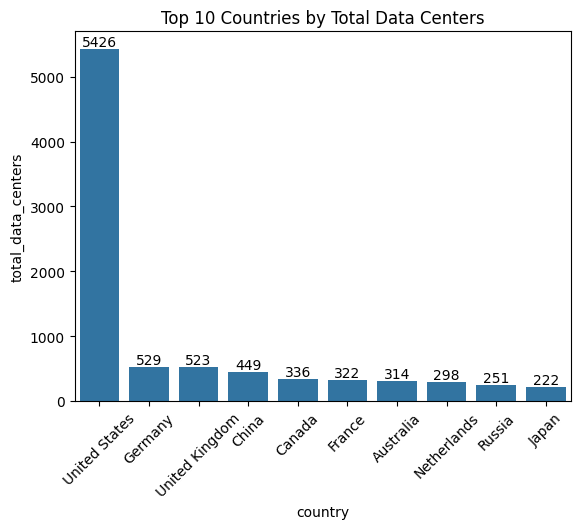

In [21]:
top10 = df.nlargest(10, "total_data_centers")

plt.Figure(figsize=(12,7))

ax = sns.barplot(data=top10, x="country", y = "total_data_centers")
plt.title("Top 10 Countries by Total Data Centers")
plt.xticks(rotation = 45)

ax.bar_label(ax.containers[0])
plt.show()

Power capacity vs total data centers (scatter)

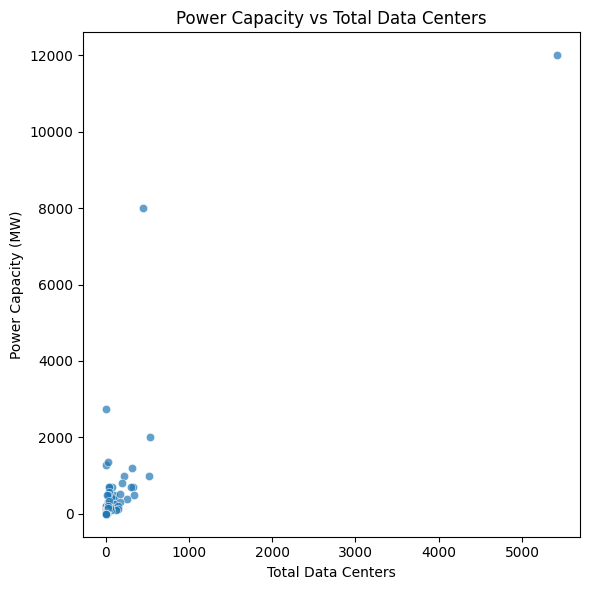

In [22]:
plt.figure(figsize=(6,6))

sns.scatterplot(data= df_final, x="total_data_centers", y="power_capacity_MW_total",alpha=0.7)

plt.title("Power Capacity vs Total Data Centers")
plt.xlabel("Total Data Centers")
plt.ylabel("Power Capacity (MW)")

plt.tight_layout()
plt.show()


Distribution of internet penetration (histogram)

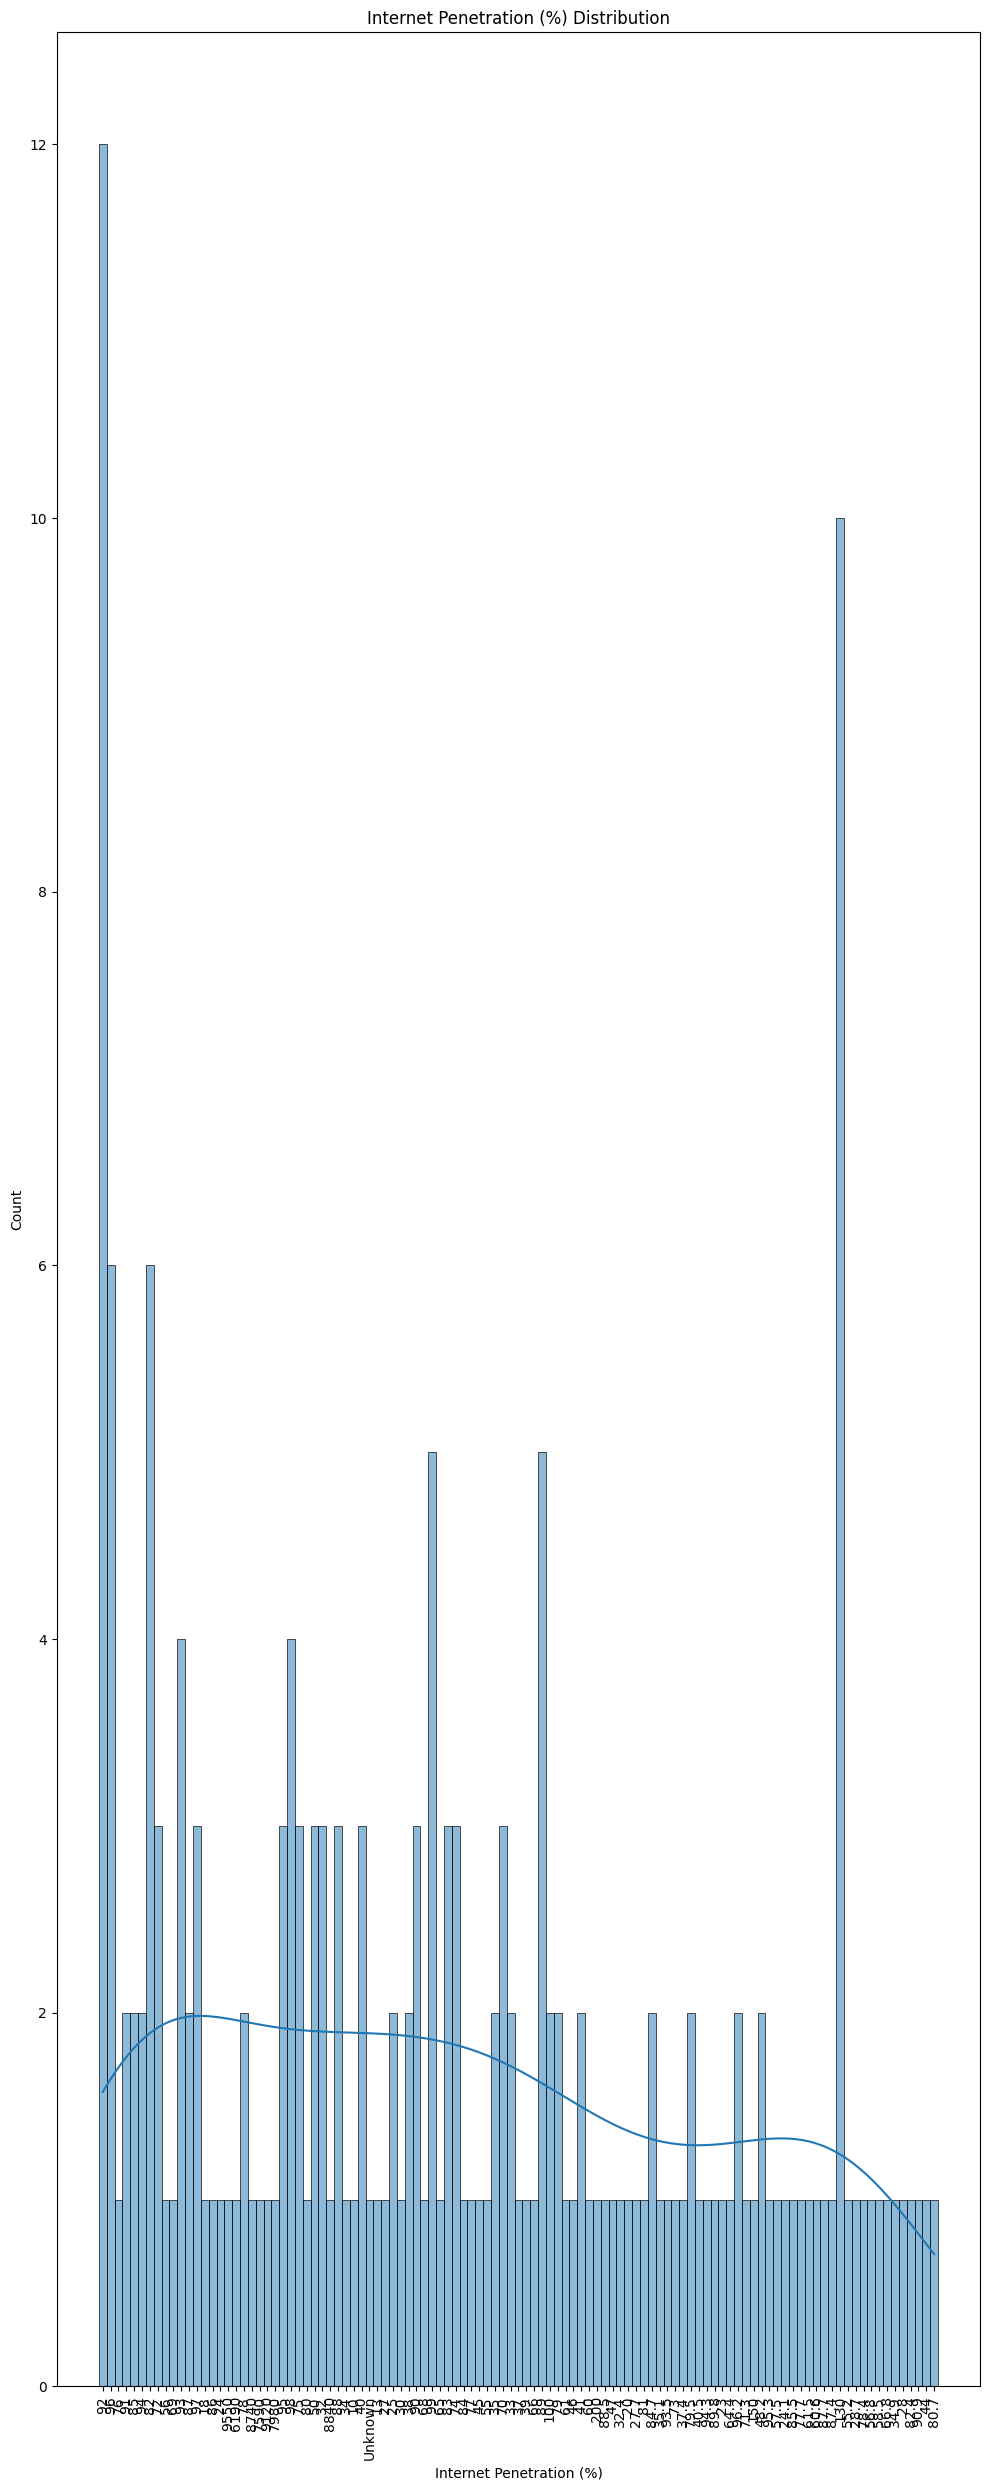

In [23]:
plt.figure(figsize=(10, 25))
sns.histplot(
    data=df,
    x="internet_penetration_percent",
    bins=50,
    kde=True
)
plt.title("Internet Penetration (%) Distribution")
plt.xlabel("Internet Penetration (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insight 1: Market concentration is extremely high (risk & saturation)


Top 5 countries hold a disproportionate share of global data centers

Long tail of countries contributes marginal capacity

Why it matters

Investors → diminishing returns in saturated regions

Operators → competition & pricing pressure

Governments → infrastructure bottlenecks

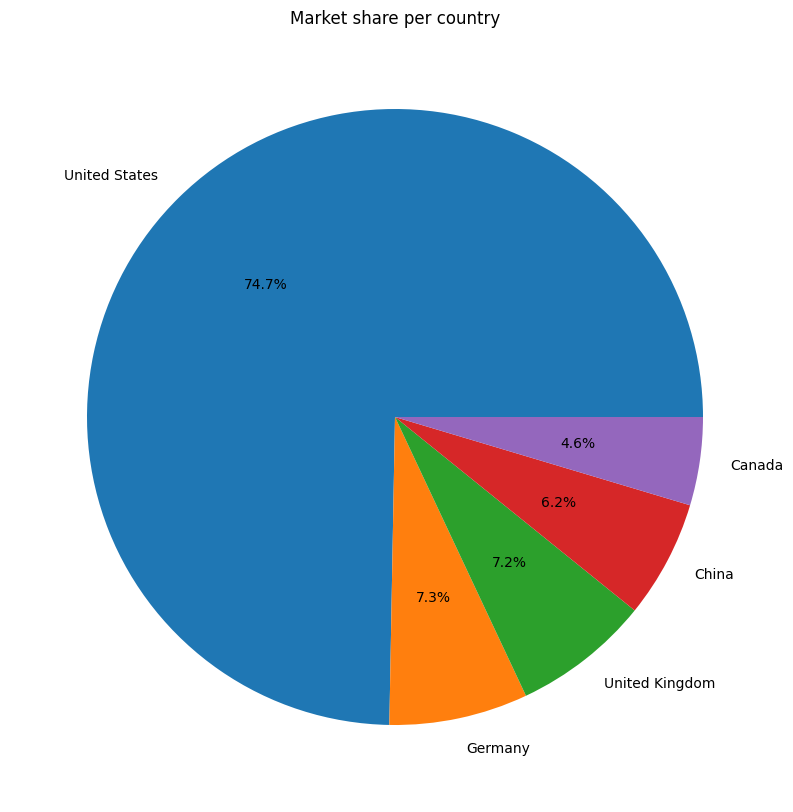

In [24]:
# Market Share (%) = total_data_centers / global_total
df_final["market_share"] = (df_final["total_data_centers"] / df_final["total_data_centers"].sum()) * 100 

top_5 = df_final.nlargest(5, "market_share")

plt.figure(figsize=(12,10))
plt.pie(top_5["market_share"], labels=top_5["country"],autopct='%1.1f%%')
plt.title("Market share per country")
plt.xticks(rotation=90)
plt.show()

Global data center infrastructure is highly concentrated, indicating both saturation risk in mature markets and expansion opportunities in emerging regions.

In [25]:
df_sort = df_final.sort_values(by="hyperscale_data_centers", ascending=False)
df_sort.head(15)

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,key_operators,cloud_provider,internet_penetration_percent,...,regulatory_challenges_or_limits,disaster_recovery_sites_common,green_dc_initiatives_description,source_of_data,tier_1,tier_2,tier_3,tier_4,tier_distribution,market_share
0,United States,5426,300,2000,3.552000e+09,12000.0,27.0,"Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,...,"Power grid strain in VA, moratoriums in some s...","Yes, especially for finance/health","Solar, wind PPA, immersion cooling, LEED","Statista, Brightlio, IEA, CBRE",5.0,15.0,60.0,20.0,,46.812182
3,China,449,100,1000,5.000000e+08,8000.0,0.0,"China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76.0,...,Power rationing in some provinces,"Yes, for government/finance","Hydro, wind, solar, green finance","Statista, CBRE, IEA",0.0,20.0,60.0,20.0,,3.873695
1,Germany,529,50,200,3.500000e+08,2000.0,40.0,"Equinix, Digital Realty, eshelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,...,"Power caps in Frankfurt, strict emissions","Yes, especially for finance","Wind, solar, carbonneutral push","Statista, CBRE, IEA",0.0,10.0,70.0,20.0,,4.563886
2,United Kingdom,523,30,150,2.000000e+08,1000.0,0.0,"Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,...,Power grid constraints in London,"Yes, especially for finance","Wind, solar, carbonneutral targets","Statista, CBRE, IEA",0.0,15.0,70.0,15.0,,4.512121
4,France,322,20,110,1.200000e+08,700.0,40.0,"Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91.0,...,Power grid constraints in Paris,"Yes, for finance/health","Wind, solar, PUE targets","Statista, CBRE, IEA",0.0,20.0,70.0,10.0,,2.778017
6,Australia,314,20,80,4.000000e+07,1200.0,0.0,"NEXTDC, Equinix, AirTrunk","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,...,Power grid constraints in Sydney,"Yes, for finance/tech","Solar, wind, carbonneutral push","Statista, CBRE, IEA",0.0,20.0,70.0,10.0,,2.708998
9,Japan,222,20,80,5.000000e+07,1000.0,0.0,"Equinix, NTT, KDDI, Colt","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",94.0,...,Power grid constraints in Tokyo/Osaka,"Yes, for finance/tech","Solar, wind, green building codes","Statista, CBRE, IEA",0.0,20.0,70.0,10.0,,1.915279
11,Singapore,99,15,60,3.000000e+07,500.0,0.0,"Equinix, Digital Realty, STT GDC","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,...,"Moratorium on new DCs 2019–2022, energy caps","Yes, for finance/tech","Solar, seawater cooling, green DC roadmap","Statista, CBRE, IEA",0.0,0.0,80.0,20.0,,0.854111
5,Canada,336,15,100,9.000000e+07,500.0,0.0,"Equinix, Cologix, eStruxture","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,...,Power grid constraints in Toronto/Vancouver,"Yes, especially for finance/health","Hydro, wind, carbonneutral push","Statista, CBRE, IEA",0.0,20.0,70.0,10.0,,2.898801
7,Netherlands,298,15,90,3.500000e+07,700.0,0.0,"Equinix, Interxion, NorthC","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,...,Moratorium in Amsterdam (lifted 2021),"Yes, especially for finance/tech","Wind, solar, green PUE targets","Statista, CBRE, IEA",0.0,10.0,80.0,10.0,,2.570960


Insight 2: Hyperscale efficiency

Some countries run fewer but much larger facilities

Others operate many smaller colocations

very few countries have hyperscalers. there counties have high power capacity but lacking hyper scalers. sustainablility is also a part for modern infrastructure

Text(0.5, 1.0, 'top 10 countries by MW capacity per data center')

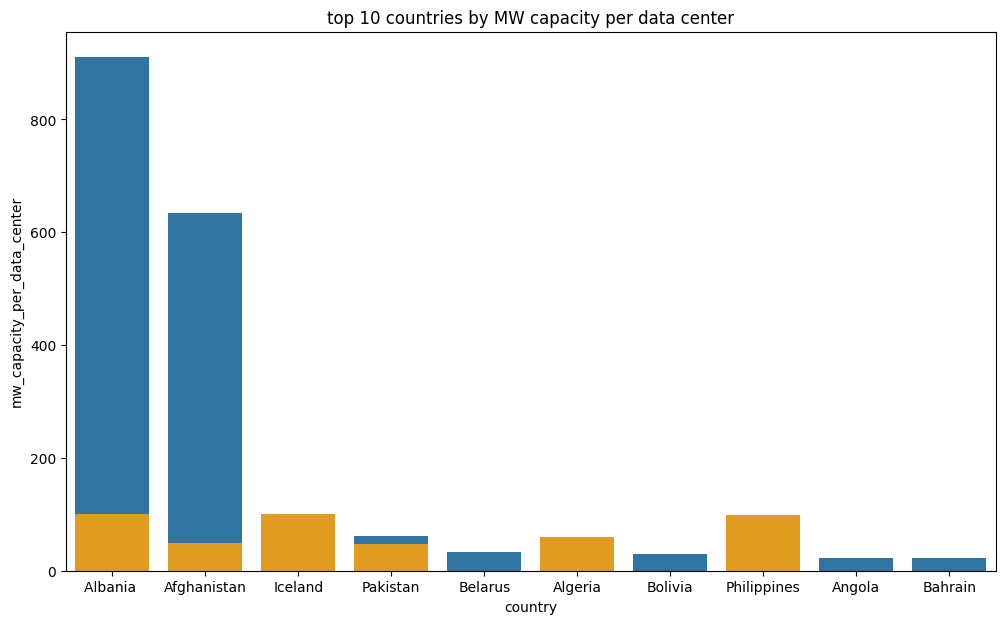

In [26]:
df_final["mw_capacity_per_data_center"]= df_final["power_capacity_MW_total"]/ df_final["total_data_centers"]

high_cap = df_final.nlargest(10,"mw_capacity_per_data_center")

plt.figure(figsize=(12,7))
sns.barplot(data=high_cap, x="country", y= "mw_capacity_per_data_center",legend=True)
sns.barplot(data=high_cap,x="country", y="average_renewable_energy_usage_percent", color="orange" ,legend=True)
plt.title("top 10 countries by MW capacity per data center")

In [27]:
df_final.to_csv("cleaned_part1.csv", index=False)

Insight 4: tier distribution and type of workloads

Tier III / IV dominance in financial & cloud hubs
Tier II-heavy regions for cost-sensitive workloads

Tier distribution reflects not just infrastructure maturity but the economic nature of workloads hosted in each region.

/var/folders/_p/9yfgz5hx20lfjbnmwy27z03r0000gn/T/ipykernel_71188/2279231273.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_tier_majority = df_final[df_final["majority_tier"].isin(["tier_3","tier_4"]).sort_values(ascending=False)].head(30)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'China'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Brazil'),
  Text(11, 0, 'Singapore'),
  Text(12, 0, 'South Africa'),
  Text(13, 0, 'India'),
  Text(14, 0, 'Mexico'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Indonesia'),
  Text(17, 0, 'Spain'),
  Text(18, 0, 'Poland'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'Angola'),
  Text(21, 0, 'Azerbaijan'),
  Text(22, 0, 'Bahamas'),
  Text(23, 0, 'Bahrain'),
  Text(24, 0, 'Bangladesh'),
  Text(25, 0, 'Barbados'),
  Text(26, 0, 'Belarus'),
  Text(27, 0, 'Belgium'),
  Text(28, 0, 'Bolivia'),
  Text(29, 0, 'Brunei')])

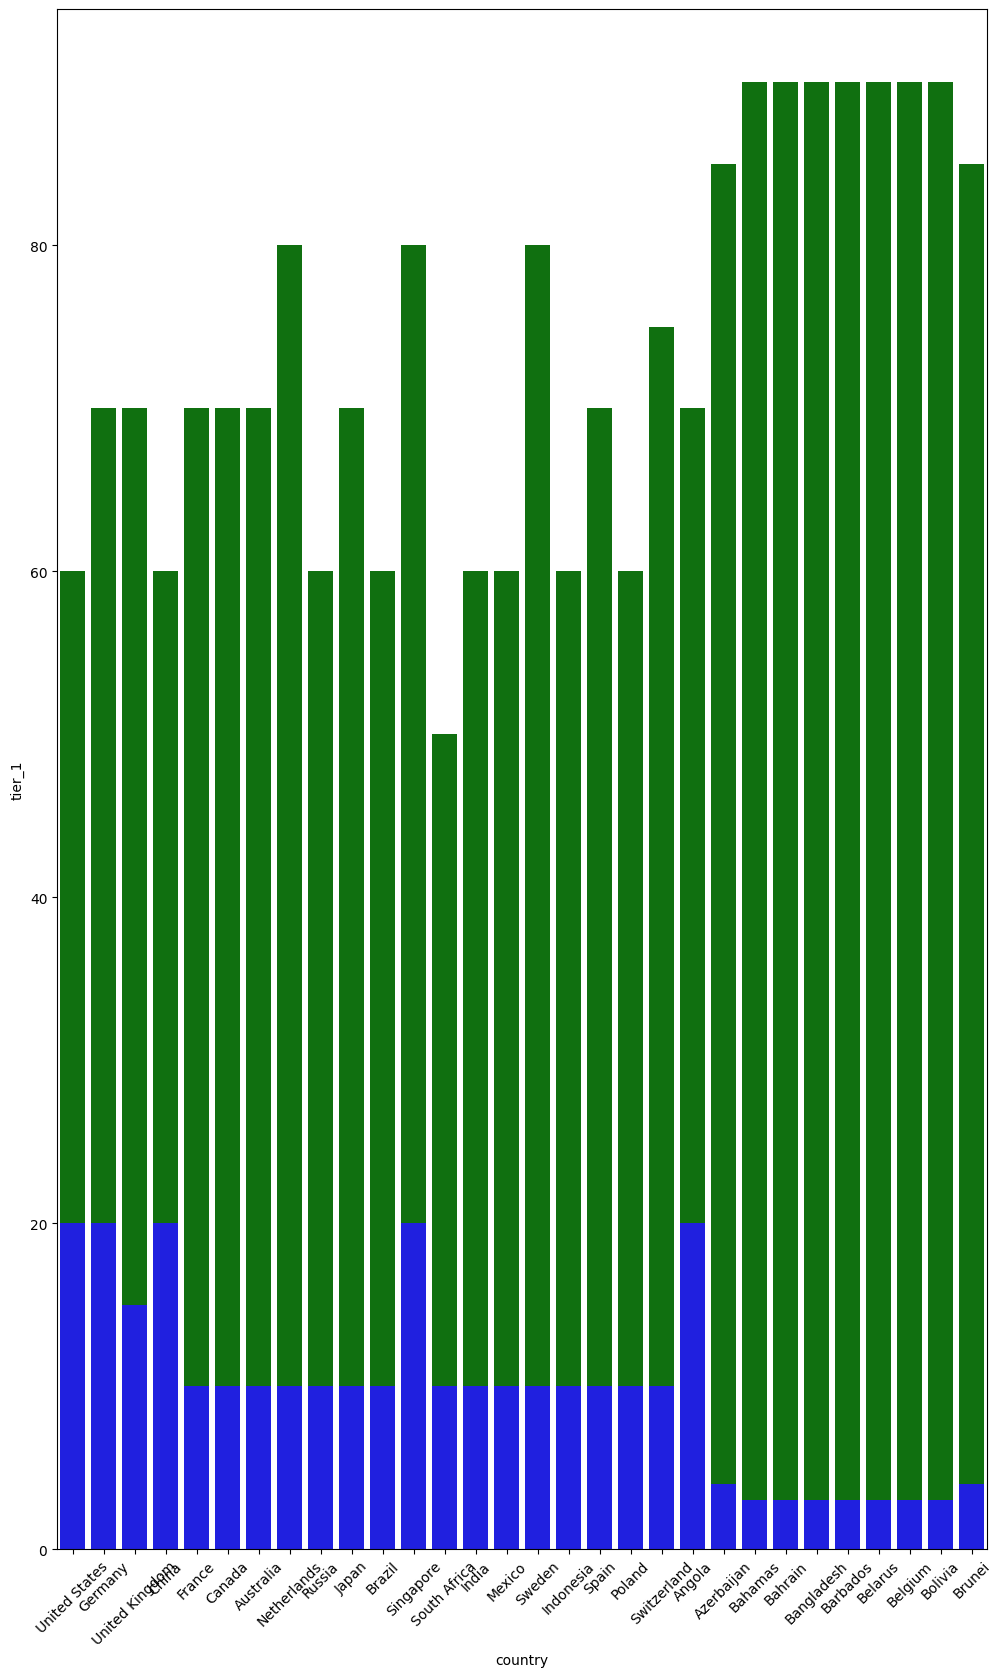

In [28]:
df_final["majority_tier"] = df_final[["tier_1","tier_2","tier_3","tier_4"]].idxmax(axis=1)

high_tier_majority = df_final[df_final["majority_tier"].isin(["tier_3","tier_4"]).sort_values(ascending=False)].head(30)



plt.figure(figsize=(12,20))
sns.barplot(data=high_tier_majority,x="country", y="tier_1", color="red")
sns.barplot(data=high_tier_majority,x="country", y="tier_2", color="yellow")
sns.barplot(data=high_tier_majority,x="country", y="tier_3", color="green")
sns.barplot(data=high_tier_majority,x="country", y="tier_4", color="blue")
plt.xticks(rotation = 45)

Tier II-heavy regions for cost-sensitive workloads

/var/folders/_p/9yfgz5hx20lfjbnmwy27z03r0000gn/T/ipykernel_71188/3954727630.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_tier_majority = df_final[df_final["majority_tier"].isin(["tier_2"]).sort_values(ascending=False)].head(30)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Argentina'),
  Text(2, 0, 'Armenia'),
  Text(3, 0, 'Belize'),
  Text(4, 0, 'Benin'),
  Text(5, 0, 'Bhutan'),
  Text(6, 0, 'Bosnia and Herzegovina'),
  Text(7, 0, 'Botswana'),
  Text(8, 0, 'Burundi'),
  Text(9, 0, 'Cape Verde'),
  Text(10, 0, 'Ecuador'),
  Text(11, 0, 'Egypt'),
  Text(12, 0, 'Equatorial Guinea'),
  Text(13, 0, 'Eritrea'),
  Text(14, 0, 'Estonia'),
  Text(15, 0, 'Eswatini'),
  Text(16, 0, 'Ethiopia'),
  Text(17, 0, 'Fiji'),
  Text(18, 0, 'Finland'),
  Text(19, 0, 'Gabon'),
  Text(20, 0, 'Gambia'),
  Text(21, 0, 'Honduras'),
  Text(22, 0, 'Iraq'),
  Text(23, 0, 'Jamaica'),
  Text(24, 0, 'Jordan'),
  Text(25, 0, 'Kazakhstan'),
  Text(26, 0, 'Laos'),
  Text(27, 0, 'Lesotho'),
  Text(28, 0, 'Namibia'),
  Text(29, 0, 'Papua New Guinea')])

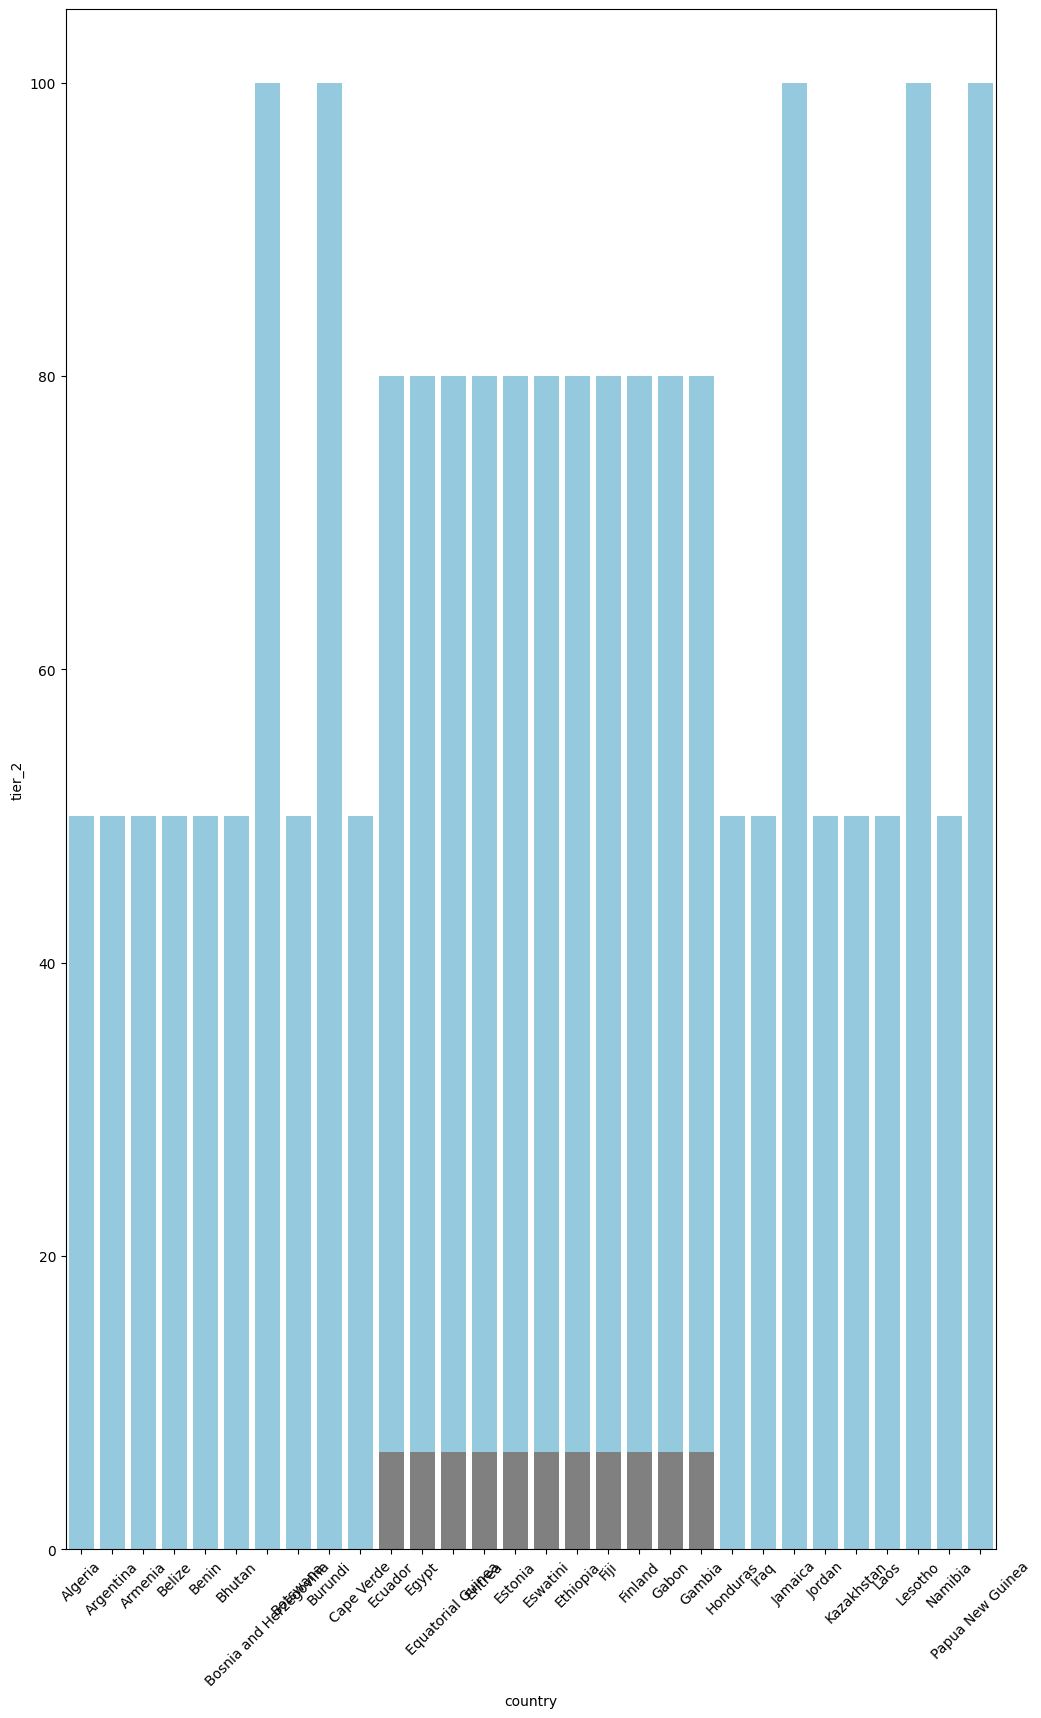

In [29]:
df_final["majority_tier"] = df_final[["tier_1","tier_2","tier_3","tier_4"]].idxmax(axis=1)

high_tier_majority = df_final[df_final["majority_tier"].isin(["tier_2"]).sort_values(ascending=False)].head(30)



plt.figure(figsize=(12,20))

sns.barplot(data=high_tier_majority,x="country", y="tier_2", color="skyblue")
sns.barplot(data=high_tier_majority,x="country", y="tier_1", color="grey")
# 
# sns.barplot(data=high_tier_majority,x="country", y="tier_2", color="yellow")
plt.xticks(rotation = 45)

Insight 5: Growth vs saturation identifies expansion targets

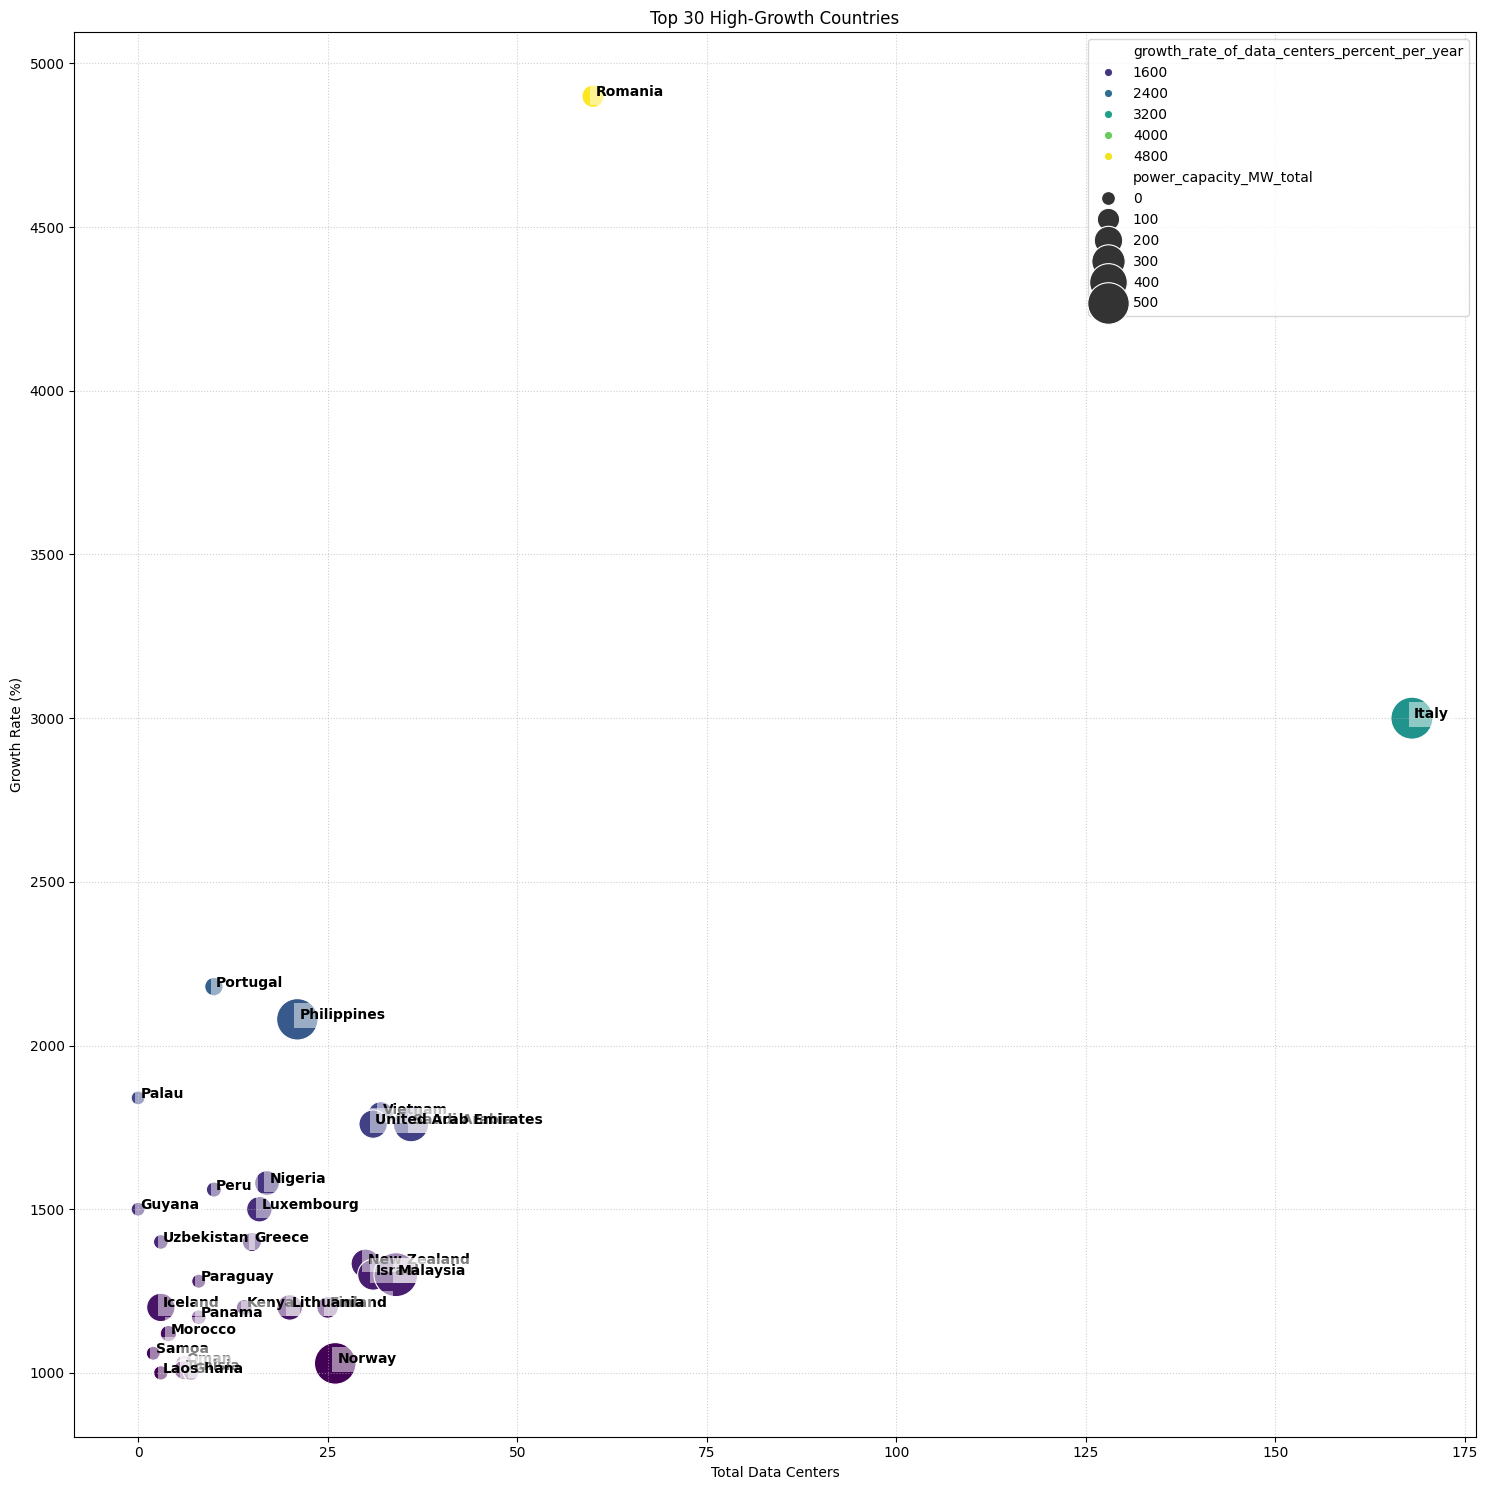

In [42]:
df_top30 = df_final.nlargest(30, "growth_rate_of_data_centers_percent_per_year").copy()


df_top30 = df_top30.reset_index(drop=True)

plt.figure(figsize=(15, 15))


sns.scatterplot(
    data=df_top30,
    x="total_data_centers", 
    y="growth_rate_of_data_centers_percent_per_year",
    size="power_capacity_MW_total",
    sizes=(100, 1000),
    hue="growth_rate_of_data_centers_percent_per_year",
    palette="viridis"
)

for i in range(len(df_top30)):
    plt.text(
        x=df_top30.loc[i, "total_data_centers"] + 0.3, # Offset to the right
        y=df_top30.loc[i, "growth_rate_of_data_centers_percent_per_year"], 
        s=df_top30.loc[i, "country"], 
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
    )

plt.title("Top 30 High-Growth Countries")
plt.xlabel("Total Data Centers")
plt.ylabel("Growth Rate (%)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()